In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data.csv', index_col = 0) #index_col = 0 means take the 1st column of dataset as index for rows
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# centering and scalling

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler() # Centering and scaling happen independently on each feature

In [5]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [7]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [8]:
print(scaled_features)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


In [9]:
df_feat = pd.DataFrame(data = scaled_features, columns=df.columns[:-1])

In [10]:
df_feat.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
test_size = 0.30
seed = 101
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
kfold = KFold(n_splits= 10, random_state=seed)
results = cross_val_score(knn,x_train,y_train,cv=kfold,scoring = 'roc_auc')

In [17]:
print("AUC =>" , 'Mean:',results.mean().round(3), '&', 'SD:',results.std().round(3))

AUC => Mean: 0.981 & SD: 0.011


In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [20]:
y_hat = knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       159
          1       0.98      0.91      0.95       141

avg / total       0.95      0.95      0.95       300



In [25]:
print(confusion_matrix(y_test,y_hat))

[[156   3]
 [ 12 129]]


In [28]:
# elbo method to find the optimum k

error_rate =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    

Text(0,0.5,'Error Rate')

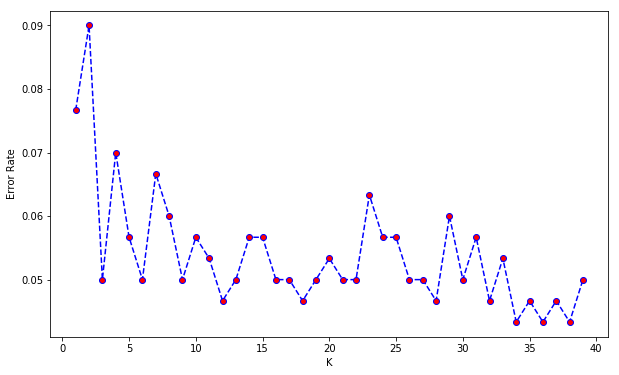

In [74]:
plt.figure(figsize=(10,6))
plt.plot( range(1,40),error_rate,color='b',linestyle='dashed',marker = 'o',markerfacecolor='r')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [75]:
# setting k=17 according to the plot
knn = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(knn,x_train,y_train,cv=kfold,scoring = 'roc_auc')
knn.fit(x_train,y_train)
y_hat = knn.predict(x_test)

In [76]:
print("AUC =>" , 'Mean:',results.mean().round(3), '&', 'SD:',results.std().round(3))
print(classification_report(y_test,y_hat))
print(confusion_matrix(y_test,y_hat))

AUC => Mean: 0.986 & SD: 0.01
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300

[[153   6]
 [  9 132]]
